In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_train = pd.read_csv("/content/train.csv")
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:
data_train.shape

(14999, 9)

#Assigning each category a number for category feature

In [ ]:
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"] = data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


removing character "f" present in data

In [ ]:
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

In [ ]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


convert values to integers for views,likes,comments,dislikes and asview

In [ ]:
data_train["views"]=pd.to_numeric(data_train["views"])
data_train["likes"]=pd.to_numeric(data_train["likes"])
data_train["comment"]=pd.to_numeric(data_train["comment"])
data_train["dislikes"]=pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])

column_vidid=data_train['vidid']

encoding the features like published,duration,vidid

In [ ]:
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])

data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


convert time in second for duration

In [ ]:
import datetime
import time

In [ ]:
import pandas as pd

# Define the checki function
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H', 'M', 'S']
    for i in y:
        if i not in P:
            mm += i
        else:
            if i == "H":
                mm = ''
            elif i == "M":
                m = mm
            else:
                s = mm
                mm = ''
    if h == '':
        h = '00'
    if m == '':
        m = '00'
    if s == '':
        s = '00'
    bp = h + ':' + m + ':' + s
    return bp

# Read the dataset
train = pd.read_csv("/content/train.csv")

# Apply the checki function to the "duration" column
mp = train["duration"]
time = mp.apply(checki)

# Define the func_sec function
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

# Apply the func_sec function to convert time strings to seconds
time1 = time.apply(func_sec)
data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,1157,6
1,2741,2,1707,56,2,6,2185,1470,4
2,8138,1,2023,25,0,2,2094,336,3
3,9005,6,620860,777,161,153,2119,662,8
4,122,1,666,1,0,0,2091,31,4


visualisation  individual plots

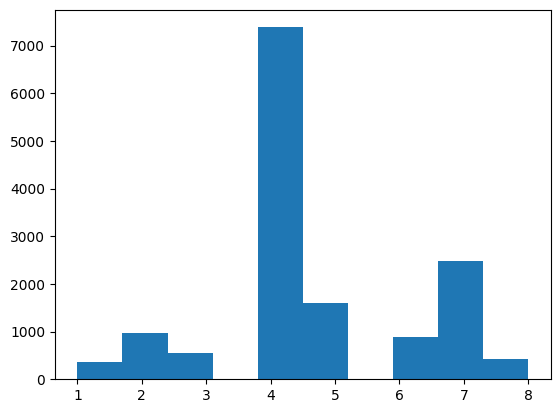

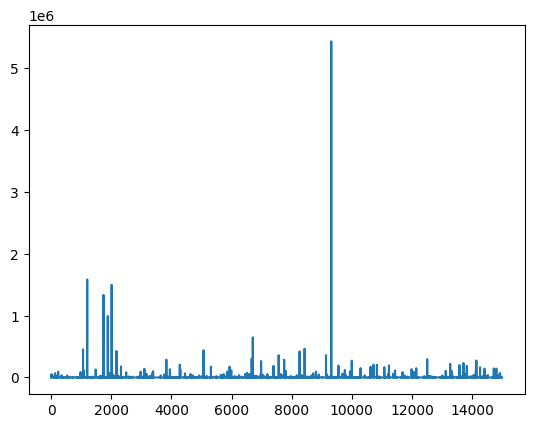

In [ ]:
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()

remove videos with adview greater than 2000000 as outlier

<Axes: >

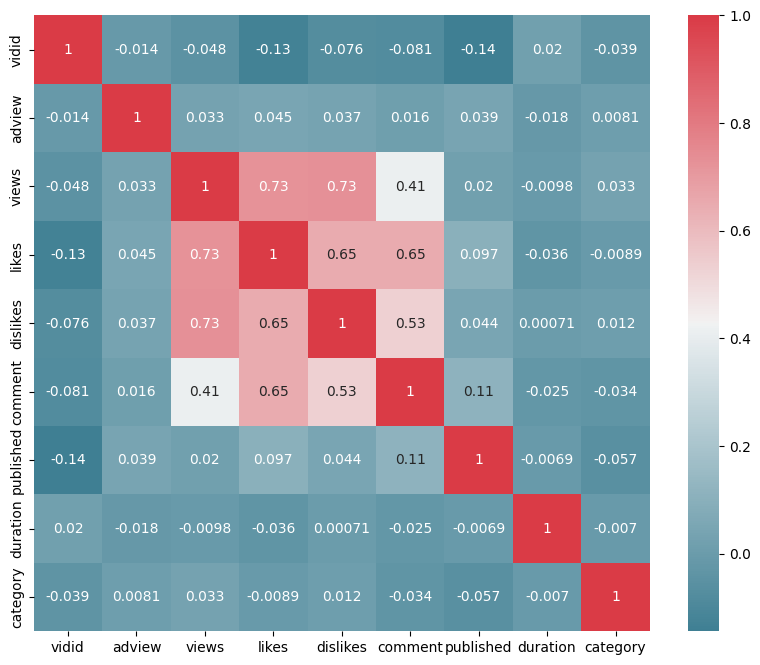

In [ ]:
import seaborn as sns
f,ax = plt.subplots(figsize=(10,8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220,10, as_cmap=True), square=True, ax=ax, annot=True)


split the data into training and testing models


In [ ]:
Y_train =pd.DataFrame(data = data_train.iloc[:,1].values,columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,1157,6
1,1707,56,2,6,2185,1470,4
2,2023,25,0,2,2094,336,3
3,620860,777,161,153,2119,662,8
4,666,1,0,0,2091,31,4


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape

(11709, 7)

In [ ]:
X_train

,views,likes,dislikes,comment,published,duration,category
12545,26171,12,2,5,1505,7720,7
7923,34417,143,2,44,1129,1618,4
3012,26086,19,0,9,966,378,6
1888,305445,3662,45,555,1484,657,7
5279,120739,766,16,227,2090,695,7
...,...,...,...,...,...,...,...
5316,31648,140,24,14,1925,531,7
13747,3435,27,0,0,1497,182,4
5522,204817,86,35,11,1237,518,4
883,1361366,1384,757,185,2145,240,7


In [ ]:
X_train.describe()

,views,likes,dislikes,comment,published,duration,category
count,1.170900e+04,11709.000000,11709.000000,11709.000000,11709.000000,11709.000000,11709.000000
mean,7.185645e+05,2792.131694,258.678965,417.458622,1550.306773,1379.506021,4.615936
std,2.852188e+06,9069.358559,1081.161583,1585.737092,581.512409,1760.254637,1.573283
min,4.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.165300e+04,87.000000,7.000000,7.000000,1140.000000,353.000000,4.000000
50%,1.619260e+05,458.000000,38.000000,46.000000,1702.000000,688.000000,4.000000
75%,5.772490e+05,1871.000000,166.000000,228.000000,2066.000000,1628.000000,6.000000
max,1.380479e+08,283824.000000,49449.000000,75045.000000,2383.000000,9490.000000,8.000000


normalise the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

X_train.mean()

0.1911903232031207

evaluation metrics

In [ ]:
from sklearn import metrics
def print_error(X_test, y_test,model_name):
  prediction = model_name.predict(X_test)
  print('Mean absolute error :',metrics.mean_absolute_error(y_test,prediction))
  print('Mean squared error :',metrics.mean_squared_error(y_test,prediction))
  print('Root mean Squared error :',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

Linear regression

In [ ]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

Mean absolute error : 5363.107655662415
Mean squared error : 10880550868.200073
Root mean Squared error : 104309.87905371223


Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)
print_error(X_test,y_test, decision_tree)

Mean absolute error : 5062.309426229508
Mean squared error : 11038619727.953552
Root mean Squared error : 105064.83582985104


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split = 15
min_samples_leaf=2
random_forest= RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf= min_samples_leaf)

In [ ]:
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

<ipython-input-86-e8e99ae432cd>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean absolute error : 5217.043713455231
Mean squared error : 10419308424.294254
Root mean Squared error : 102075.01371194742


support vector machine

In [ ]:
from sklearn.svm import SVR
supportvector_regressor=SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean absolute error : 5363.107655662415
Mean squared error : 10880550868.200073
Root mean Squared error : 104309.87905371223


Artificial Neural Networks

In [ ]:
import keras
from keras.layers import Dense

In [ ]:
ann = keras.models.Sequential([
                               Dense(6, activation="relu",
                               input_shape=X_train.shape[1:]),
                               Dense(6, activation="relu"),
                               Dense(1)
                               ])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

history=ann.fit(X_train,y_train,epochs=100)

ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 3s 3ms/step - loss: 767618688.0000 - mean_squared_error: 767618688.0000
Epoch 2/100
366/366 [==============================] - 1s 3ms/step - loss: 767614336.0000 - mean_squared_error: 767614336.0000
Epoch 3/100
366/366 [==============================] - 1s 3ms/step - loss: 767605888.0000 - mean_squared_error: 767605888.0000
Epoch 4/100
366/366 [==============================] - 1s 3ms/step - loss: 767587008.0000 - mean_squared_error: 767587008.0000
Epoch 5/100
366/366 [==============================] - 1s 3ms/step - loss: 767554048.0000 - mean_squared_error: 767554048.0000
Epoch 6/100
366/366 [==============================] - 1s 3ms/step - loss: 767498240.0000 - mean_squared_error: 767498240.0000
Epoch 7/100
366/366 [==============================] - 1s 3ms/step - loss: 767425984.0000 - mean_squared_error: 767425984.0000
Epoch 8/100
366/366 [==============================] - 1s 3ms/step - loss: 767339200.0000 - mean_squared_error:

Saving scikitlearn models

In [ ]:
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")


['decisiontree_youtubeadview.pkl']

In [ ]:
#Saving keras Artificial Neural Network Model
ann.save("ann_youtubeadview.h5")

In [96]:
df = pd.read_csv("/content/test.csv")

In [97]:
df.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [98]:
from keras.models import load_model
model = load_model("ann_youtubeadview.h5")

In [99]:
# Removing character "F" present in data
dft=dft[dft.views!='F']
dft=dft[dft.likes!='F']
dft=dft[dft.dislikes!='F']
dft=dft[dft.comment!='F']

In [100]:
df.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [101]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
dft["category"]=dft["category"].map(category)
dft.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [102]:
# Convert values to integers for views, likes, comments, dislikes and adview
dft["views"] = pd.to_numeric(dft["views"])
dft["comment"] = pd.to_numeric(dft["comment"])
dft["likes"] = pd.to_numeric(dft["likes"])
dft["dislikes"] = pd.to_numeric(dft["dislikes"])
column_vidid=dft['vidid']

In [103]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
dft['duration']=LabelEncoder().fit_transform(dft['duration'])
dft['vidid']=LabelEncoder().fit_transform(dft['vidid'])
dft['published']=LabelEncoder().fit_transform(dft['published'])
dft.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [105]:
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train=pd.read_csv("/content/test.csv")
mp = pd.read_csv("/content/test.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

dft["duration"]=time1
dft.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [106]:
dft=dft.drop(["vidid"],axis=1)
dft.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [107]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = dft
X_test=scaler.fit_transform(X_test)

In [108]:
prediction = model.predict(X_test)

268/268 [==============================] - 1s 4ms/step


In [109]:
prediction=pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float32
dtypes: float32(1)
memory usage: 33.5 KB


In [110]:
prediction = prediction.rename(columns={0: "Adview"})

In [111]:
prediction.head()

,Adview
0,2270.846436
1,2546.786865
2,1707.715088
3,1533.373901
4,2170.378662


In [112]:
prediction.to_csv('predictions.csv')

Therefore predictions are made.